<a href="https://colab.research.google.com/github/ShivamKailkhura/Machine-Learning-Models/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description :This program will classify images

In [1]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D , MaxPooling2D , Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
#Look at the datatype of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of the arrays
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#Take a look at the first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

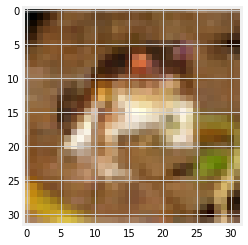

In [6]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
#Get the image label
print('The image label is:',y_train[index])

The image label is: [6]


In [8]:
#Get the image classification
classification = ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']
#print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [9]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Print the new labels
#A set of 10 numbers .All of the column will contain value 0 except for one column that will contain one and that will be corresponding to that label.
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#Print the new label of the current image or label above
print('The one hot label is: ',y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
#Noramlize the pixels to be values between 0 and 1 
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer.This should reduce the dimiginality to a linear array
model.add(Flatten())

#Take all this data and import it into some network
#A layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))



In [16]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [17]:
#Train the model:
hist = model.fit(x_train, y_train_one_hot,batch_size= 256,epochs = 10,validation_split= 0.2)

Epoch 1/10
157/157 [==============================] - 53s 334ms/step - loss: 1.7802 - accuracy: 0.3347 - val_loss: 1.4857 - val_accuracy: 0.4491
Epoch 2/10
157/157 [==============================] - 53s 338ms/step - loss: 1.4163 - accuracy: 0.4818 - val_loss: 1.2936 - val_accuracy: 0.5267
Epoch 3/10
157/157 [==============================] - 52s 334ms/step - loss: 1.2557 - accuracy: 0.5488 - val_loss: 1.1517 - val_accuracy: 0.5840
Epoch 4/10
157/157 [==============================] - 52s 333ms/step - loss: 1.1509 - accuracy: 0.5903 - val_loss: 1.0776 - val_accuracy: 0.6141
Epoch 5/10
157/157 [==============================] - 52s 333ms/step - loss: 1.0660 - accuracy: 0.6195 - val_loss: 1.0819 - val_accuracy: 0.6128
Epoch 6/10
157/157 [==============================] - 52s 333ms/step - loss: 0.9901 - accuracy: 0.6464 - val_loss: 0.9983 - val_accuracy: 0.6482
Epoch 7/10
157/157 [==============================] - 52s 334ms/step - loss: 0.9279 - accuracy: 0.6709 - val_loss: 1.0168 - val_ac

In [18]:
#Evaluate the model using test dataset
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9023 - accuracy: 0.6836


0.6836000084877014

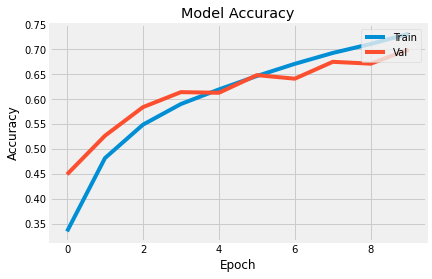

In [19]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

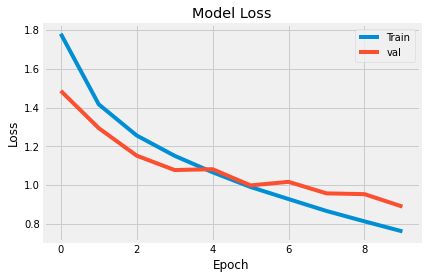

In [22]:
#Lets visualize the models loss
#visualize the models accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [23]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


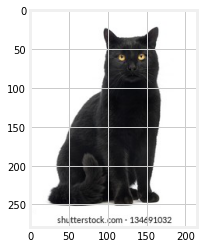

In [24]:
#show the image
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

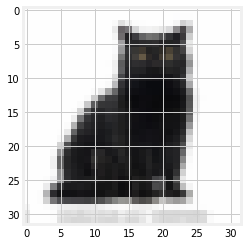

In [25]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

In [26]:
#Get the models prediction
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[1.9968131e-03, 1.1490969e-04, 4.3035345e-03, 8.0418444e-01,
        1.8955670e-04, 1.7952158e-01, 5.4602040e-04, 8.7366384e-03,
        2.1906588e-05, 3.8452446e-04]], dtype=float32)

In [27]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order 
print(list_index)      

[3, 5, 7, 2, 0, 6, 9, 4, 1, 8]


In [29]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2),'%')

cat : 80.42 %
dog : 17.95 %
horse : 0.87 %
bird : 0.43 %
airplane : 0.2 %
